<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загружаем-датасеты-с-сезонами" data-toc-modified-id="Загружаем-датасеты-с-сезонами-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загружаем датасеты с сезонами</a></span><ul class="toc-item"><li><span><a href="#Описательная-статистика:" data-toc-modified-id="Описательная-статистика:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Описательная статистика:</a></span></li><li><span><a href="#Визуализация-данных" data-toc-modified-id="Визуализация-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Визуализация данных</a></span></li><li><span><a href="#Регрессия-временных-рядов" data-toc-modified-id="Регрессия-временных-рядов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Регрессия временных рядов</a></span></li></ul></li><li><span><a href="#Сегментированный-анализ:" data-toc-modified-id="Сегментированный-анализ:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сегментированный анализ:</a></span></li><li><span><a href="#Анализ-регрессии" data-toc-modified-id="Анализ-регрессии-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ регрессии</a></span><ul class="toc-item"><li><span><a href="#Тест-Манна-Кендалла" data-toc-modified-id="Тест-Манна-Кендалла-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тест Манна-Кендалла</a></span></li><li><span><a href="#Регрессия-для-каждой-позиции" data-toc-modified-id="Регрессия-для-каждой-позиции-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Регрессия для каждой позиции</a></span></li></ul></li><li><span><a href="#Анализ-регрессии-для-новых-игроков" data-toc-modified-id="Анализ-регрессии-для-новых-игроков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ регрессии для новых игроков</a></span></li><li><span><a href="#Регрессия-индекса-массы-тела" data-toc-modified-id="Регрессия-индекса-массы-тела-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Регрессия индекса массы тела</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [16]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels.api as sm
from statsmodels import robust
from scipy.stats import kde
from scipy.stats import shapiro 
from sklearn.linear_model import LinearRegression
import pymannkendall as mk


import warnings
warnings.filterwarnings('ignore')

# Введение

    В последнее время от экспертов и игроков Национальной Хоккейно Лиги (NHL) все чаще слышишь тезис о том, что лига становится моложе и делается уклон в сторону более низких и легковесных, но юрких хоккеистов. Хоккей с его огромными хоккеистами уходит в прошлое, а габариты таких "гигантов", как нападающий New York Ranger Matt Rempe с его ростом 200 см и весом 109 кг обусждается больше, чем сама игра хоккеиста.
Я взял с сайта [NHL](https://www.nhl.com/stats/) данные о последних 10 сезонах по игрокам, который провели больше 10 матчей в сезоне.
**Проанализируем эти данные и посмотрим, действительно ли лига становится моложе, а игроки становятся меньше и легче**

# Загружаем датасеты с сезонами

У нас есть файлы с датасетами по сезонам, в которых присутствуют данные по игрокам, которые сыграли больше 10 матчей в сезоне NHL, взятые с официального сайта [Национальной хоккейной лиги](https://www.nhl.com/stats/skaters)

In [3]:
# создадим список с именами файлов, в которых лежат данные по каждому сезону
all_files = glob.glob("bio/PlayersBio20*.csv")

In [4]:
# Создание пустого списка для хранения данных
season_data = []

In [5]:
# Чтение всех файлов и добавление данных в список
for filename in all_files:
    df = pd.read_csv(filename)
    # Добавляем столбец 'season' на основе имени файла
    season = filename.split('Bio')[-1].split('.')[0]
    df['season'] = season
    df = df[['Pos', 'DOB', 'Ht', 'Wt', 'GP', 'season', '1st Season']]
    season_data.append(df)
    

In [6]:
# Объединение всех данных в один DataFrame
data = pd.concat(season_data, ignore_index=True)

In [7]:
# Посмотрим на 5 случайных строк
data.sample(n=5)

,Pos,DOB,Ht,Wt,GP,season,1st Season
279,D,1983-06-08,71,180,43,2014-2015,20062007
853,C,1987-08-07,71,200,80,2015-2016,20052006
4411,C,1988-04-29,74,201,70,2019-2020,20072008
1935,C,1991-02-22,75,200,19,2016-2017,20142015
5379,D,1994-07-25,72,181,57,2021-2022,20132014


In [8]:
#Посмотрим иобщую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7546 entries, 0 to 7545
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pos         7546 non-null   object
 1   DOB         7546 non-null   object
 2   Ht          7546 non-null   int64 
 3   Wt          7546 non-null   int64 
 4   GP          7546 non-null   int64 
 5   season      7546 non-null   object
 6   1st Season  7546 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 412.8+ KB


In [9]:
# Преобразуем номер первого сезона
data['1st Season'] = data['1st Season'].astype(str)
data['1st Season'] = data['1st Season'].str.slice(start=4)
data['1st Season'] = data['1st Season'].astype(int)


Рост представлен в дюймах, а вес в фунтах. Переведем вес и рост в метрическую систему и рассичтаем возраст игроков

In [10]:
s = []
for i in range(len(data)):
    s.append(int(data.iloc[i]['season'].split('-')[-1]))
data['s'] = s
data['DOB'] = pd.to_datetime(data['DOB'])
data['age'] = data['s'] - pd.DatetimeIndex(data['DOB']).year
data.drop(['s', 'DOB'], axis = 1, inplace=True)

In [11]:

data['Ht_cm'] = round((data['Ht']*0.0254),2)*100
data['Ht_cm'] = data['Ht_cm'].astype(int)
data['Wt_kg'] = round(data['Wt'] *0.45359237, 2)

In [12]:
data.sample(n=5)

,Pos,Ht,Wt,GP,season,1st Season,age,Ht_cm,Wt_kg
5456,D,71,190,69,2021-2022,2007,40,180,86.18
7163,C,74,201,28,2023-2024,2021,24,188,91.17
2095,R,72,223,53,2016-2017,2012,25,183,101.15
3175,L,72,210,73,2018-2019,2008,32,183,95.25
5616,L,71,179,74,2021-2022,2017,27,180,81.19


In [14]:
# Посмотрим на показатели числовых данных
data.describe()

,Ht,Wt,GP,1st Season,age,Ht_cm,Wt_kg
count,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000
mean,73.208455,201.082560,56.942486,2013.882454,27.642725,185.795388,91.209321
std,2.117462,15.215272,22.024268,5.047222,4.266236,5.356033,6.901471
min,64.000000,153.000000,10.000000,1991.000000,19.000000,163.000000,69.400000
25%,72.000000,190.000000,41.000000,2011.000000,24.000000,183.000000,86.180000
50%,73.000000,200.000000,63.000000,2014.000000,27.000000,185.000000,90.720000
75%,75.000000,210.000000,77.000000,2017.000000,30.000000,190.000000,95.250000
max,81.000000,265.000000,85.000000,2024.000000,46.000000,206.000000,120.200000


## Описательная статистика:


Расчитаем основные статистичесике показатели (среднее, медиана, стандартное отклонение) для возраста, роста и веса игроков по каждому сезону.

In [15]:
# Функция для расчета основных статистических показателей
def calculate_statistics(data, season, column):
    stats = data.groupby(season)[column].agg(['mean', 'median', 'std'])
    return stats

# Расчет статистических показателей для возраста, роста и веса
age_stats = calculate_statistics(data,'season', 'age')
height_stats = calculate_statistics(data,'season', 'Ht')
weight_stats = calculate_statistics(data,'season', 'Wt')
height_stats_cm = calculate_statistics(data,'season', 'Ht_cm')
weight_stats_kg = calculate_statistics(data,'season', 'Wt_kg')


# Вывод результатов
print("Статистические показатели для возраста:")
print(age_stats)
print("\nСтатистические показатели для роста:")
print(height_stats_cm)
print("\nСтатистические показатели для веса:")
print(weight_stats_kg)

Статистические показатели для возраста:
                mean  median       std
season                                
2014-2015  27.865753    27.0  4.548903
2015-2016  27.573370    27.0  4.436711
2016-2017  27.427989    27.0  4.430596
2017-2018  27.362319    27.0  4.341212
2018-2019  27.212516    27.0  4.090101
2019-2020  27.463315    27.0  4.105912
2020-2021  27.575549    27.0  4.110550
2021-2022  27.683168    27.0  4.212581
2022-2023  28.000000    28.0  4.081955
2023-2024  28.239637    28.0  4.213909

Статистические показатели для роста:
                 mean  median       std
season                                 
2014-2015  185.649315   185.0  5.279594
2015-2016  185.884511   185.0  5.330337
2016-2017  185.705163   185.0  5.273089
2017-2018  185.566535   185.0  5.272569
2018-2019  185.674055   185.0  5.215526
2019-2020  185.710598   185.0  5.318094
2020-2021  185.901099   185.0  5.359289
2021-2022  185.923267   185.0  5.485504
2022-2023  186.042636   185.0  5.443297
2023-2024  185

## Визуализация данных

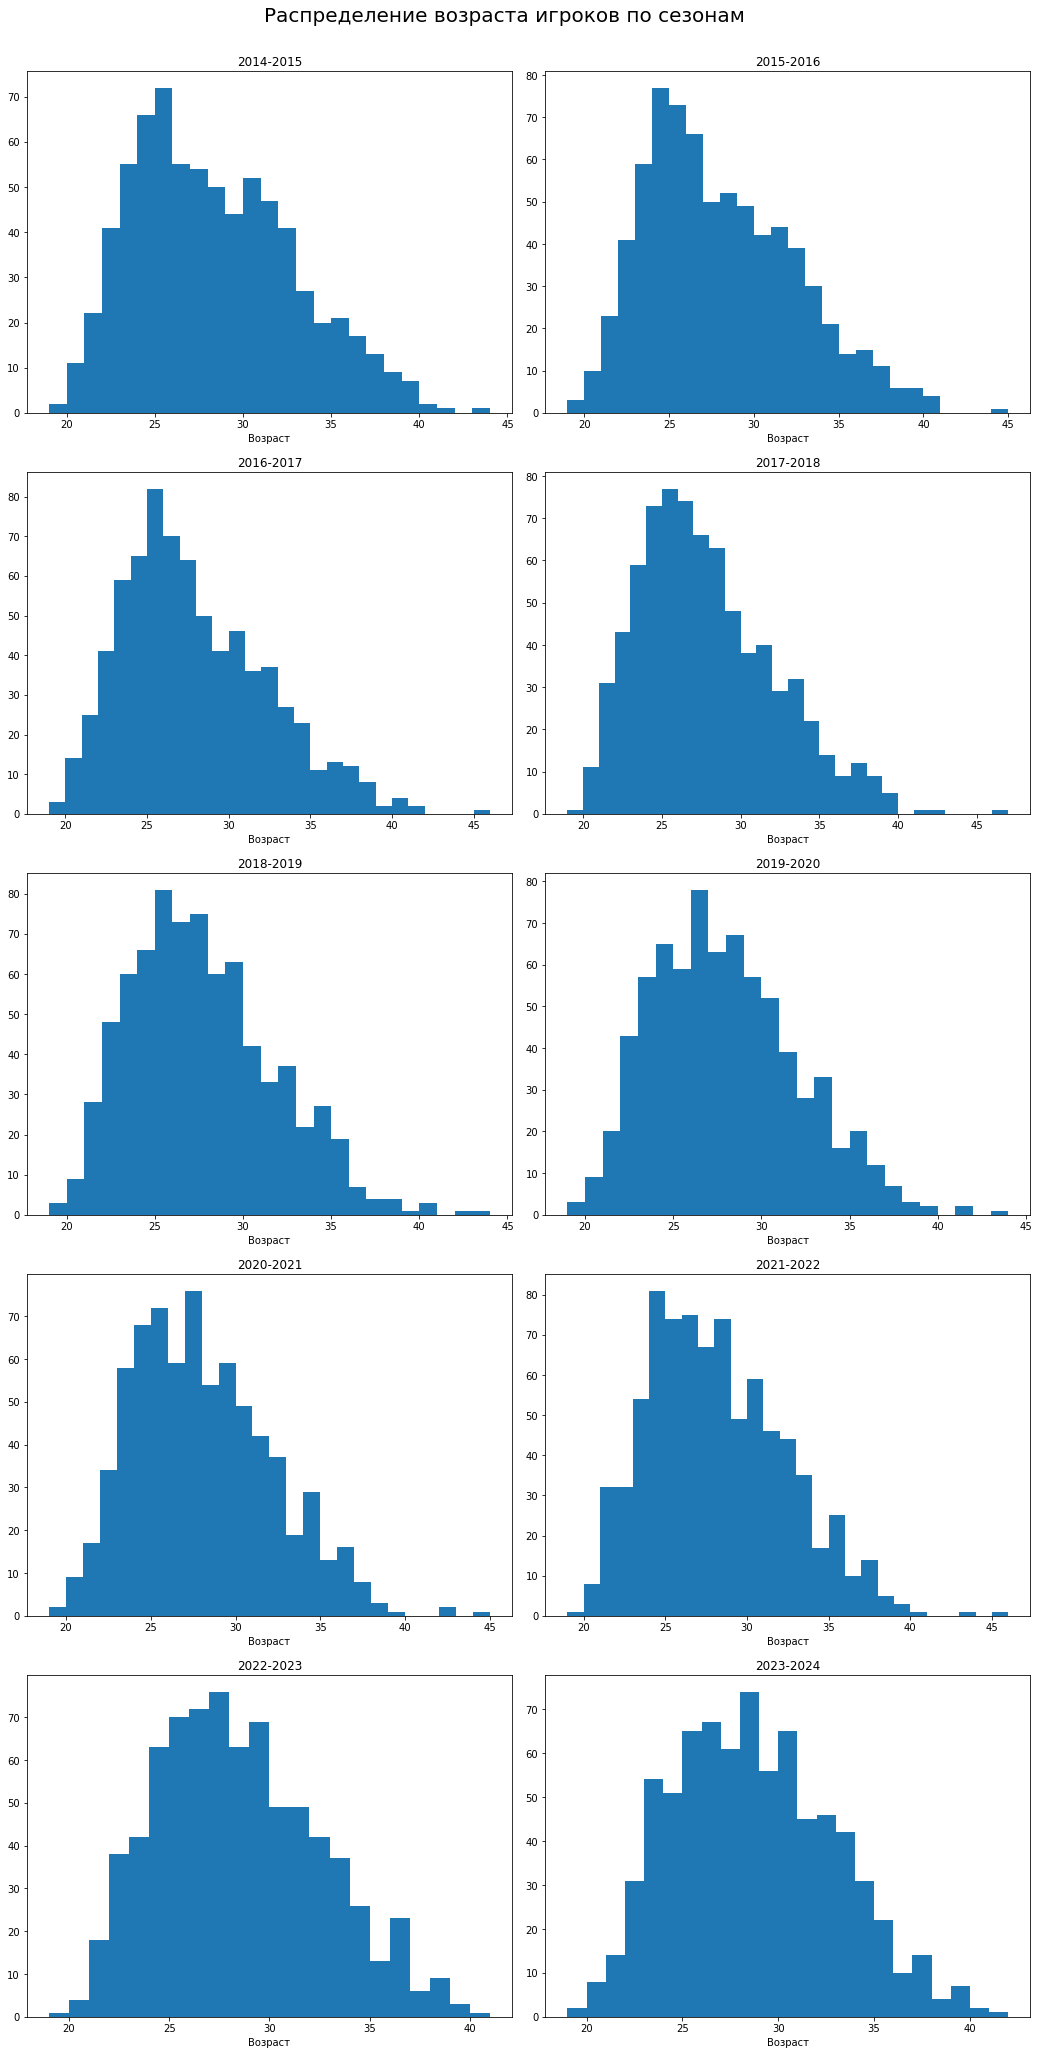

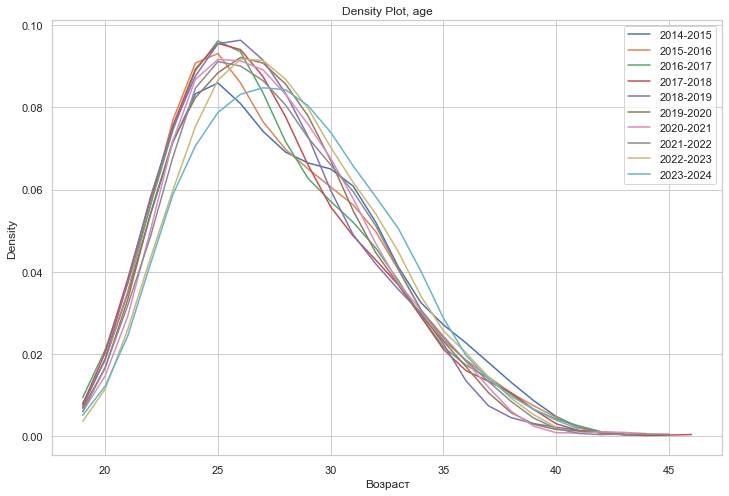

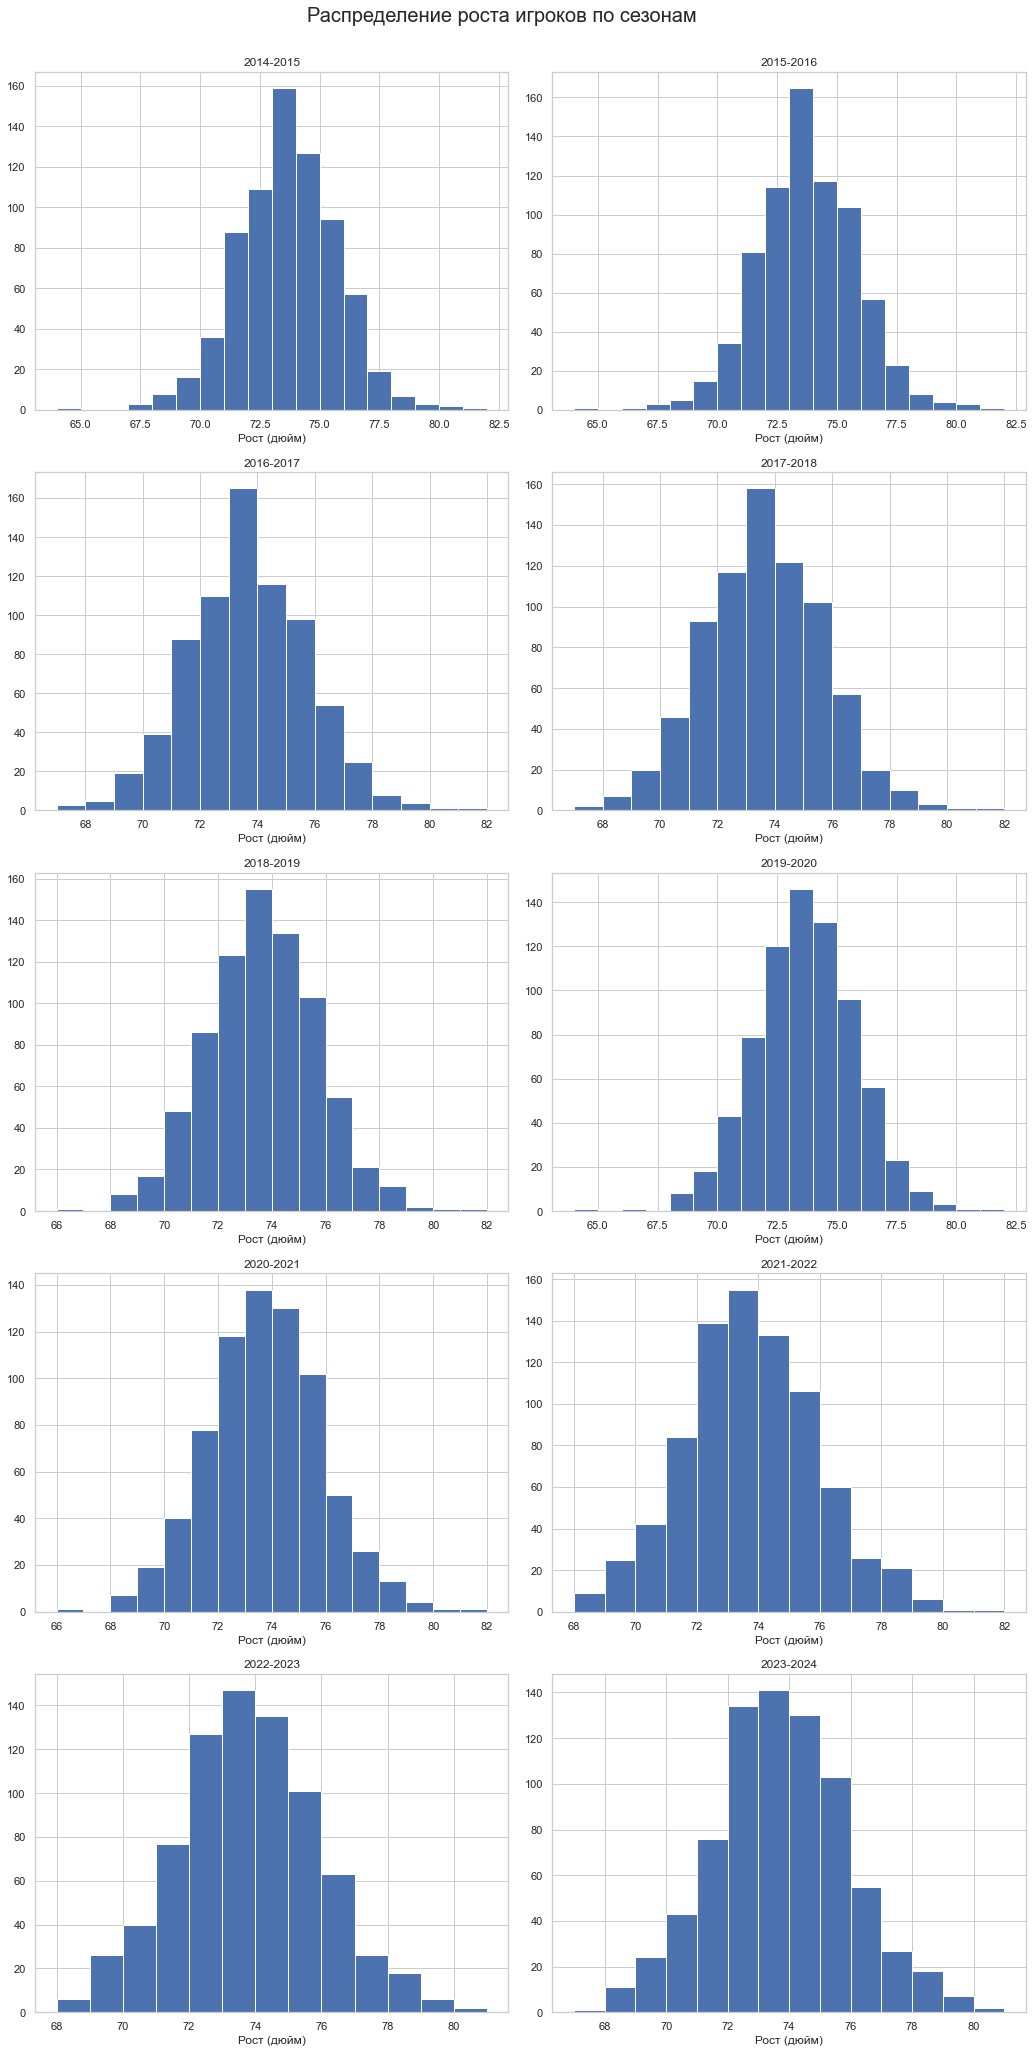

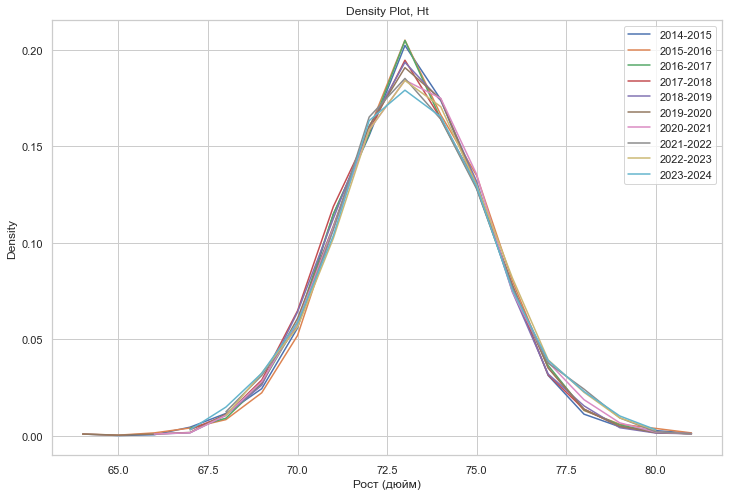

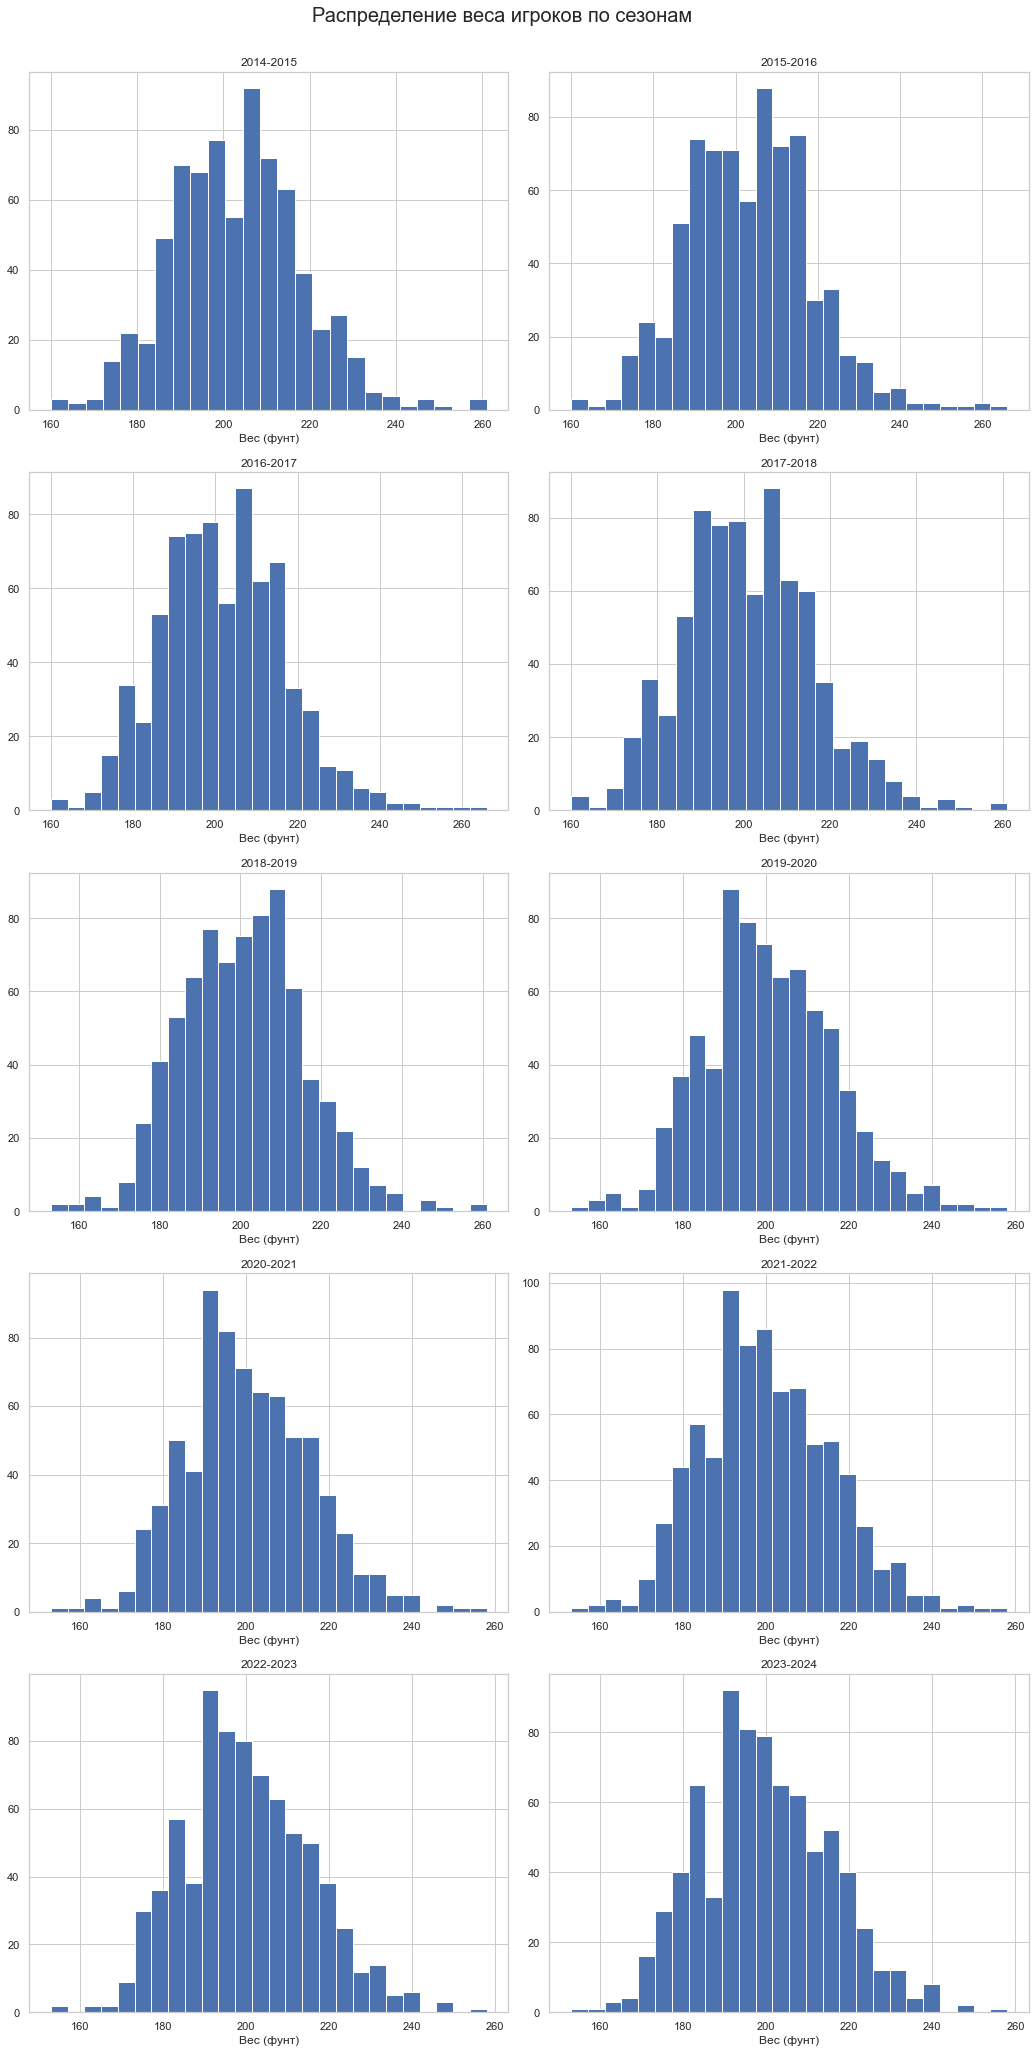

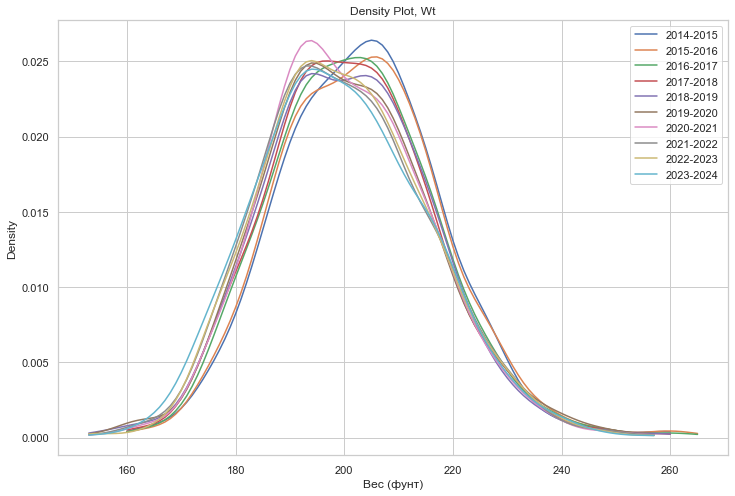

In [14]:
# Получаем уникальные сезоны
seasons = data['season'].unique()

# Устанавливаем количество строк и колонок для субплотов
nrows = 5
ncols = 2

# Функция для построения гистограмм с кривыми плотности по сезонам
def plot_histograms_with_density(column, title, xlabel):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))
    fig.suptitle(title, fontsize=20)
    axes = axes.flatten()
    for i, season in enumerate(seasons):
        season_data = data[data['season'] == season][column].to_numpy()
        if column == 'Wt':
            bins = int(((np.max(season_data) - np.min(season_data)))//4)
        else:
            bins = int((np.max(season_data) - np.min(season_data))) +1
        axes[i].hist(season_data, 
                     bins=bins, density = False, 
                     range = [np.round(np.min(season_data)).astype(int), np.round(np.max(season_data).astype(int)+1)])
        axes[i].set_title(season)
        axes[i].set_xlabel(xlabel)
    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.subplots_adjust(top=0.95)
    plt.show()
        # Draw the density plot
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    for season in seasons:
        season_data = data[data['season'] == season][column]
        season_data.plot.density(ind = np.arange(min(season_data), max(season_data)+1))

        # Plot formatting
    plt.legend(seasons)
    plt.title('Density Plot, '+ column)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.show()
    
# Построение гистограмм с кривыми плотности для возраста, роста и веса
plot_histograms_with_density('age', 'Распределение возраста игроков по сезонам', 'Возраст')
plot_histograms_with_density('Ht', 'Распределение роста игроков по сезонам', 'Рост (дюйм)')
plot_histograms_with_density('Wt', 'Распределение веса игроков по сезонам', 'Вес (фунт)')

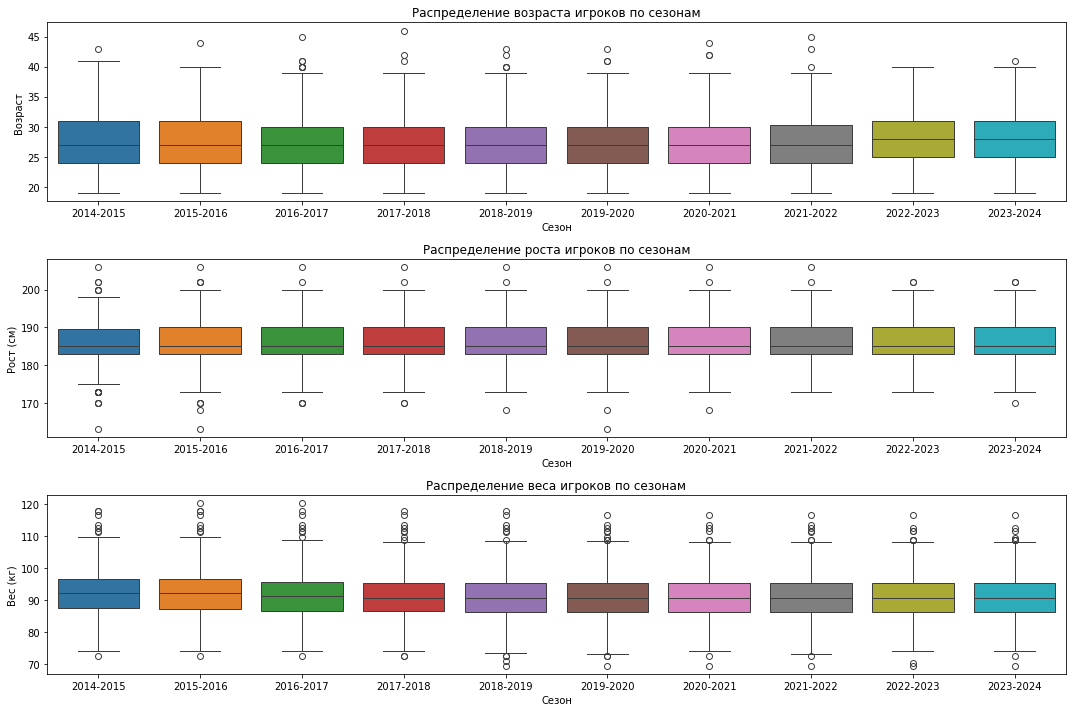

In [17]:
# Настройка параметров графиков
plt.figure(figsize=(15, 10))

# Боксплоты возраста
plt.subplot(3, 1, 1)
sns.boxplot(x='season', y='age', data=data, palette='tab10')
plt.title('Распределение возраста игроков по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Возраст')

# Боксплоты роста
plt.subplot(3, 1, 2)
sns.boxplot(x='season', y='Ht_cm', data=data, palette='tab10')
plt.title('Распределение роста игроков по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Рост (см)')

# Боксплоты веса
plt.subplot(3, 1, 3)
sns.boxplot(x='season', y='Wt_kg', data=data, palette='tab10')
plt.title('Распределение веса игроков по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Вес (кг)')

plt.tight_layout()
plt.show()

## Регрессия временных рядов

In [18]:
# Преобразование сезона в числовое значение для регрессии
def season_to_numeric(season):
    _, end_year = map(int, season.split('-'))
    return end_year

In [19]:
data['season_numeric'] = data['season'].apply(season_to_numeric)

In [20]:
data.head()

,Pos,Ht,Wt,GP,season,1st Season,age,Ht_cm,Wt_kg,season_numeric
0,L,74,213,71,2014-2015,2008,28,188,96.62,2015
1,R,72,200,70,2014-2015,2001,38,183,90.72,2015
2,R,70,185,13,2014-2015,2013,25,178,83.91,2015
3,D,77,223,11,2014-2015,2001,35,196,101.15,2015
4,D,75,213,82,2014-2015,2009,27,190,96.62,2015


Применяя Линейную регрессию, построим график временных рядов и трендовой регрессионной линии для каждого признака. Для выполнения линейной регрессии не обязательно, чтобы сами данные (например, возраст игроков) были распределены нормально. Важно, чтобы остатки (ошибки предсказания модели) были нормально распределены. Распределение остатков мы проверим с помощью построения `QQ-плота` и теста `Шапиро-Уилка`

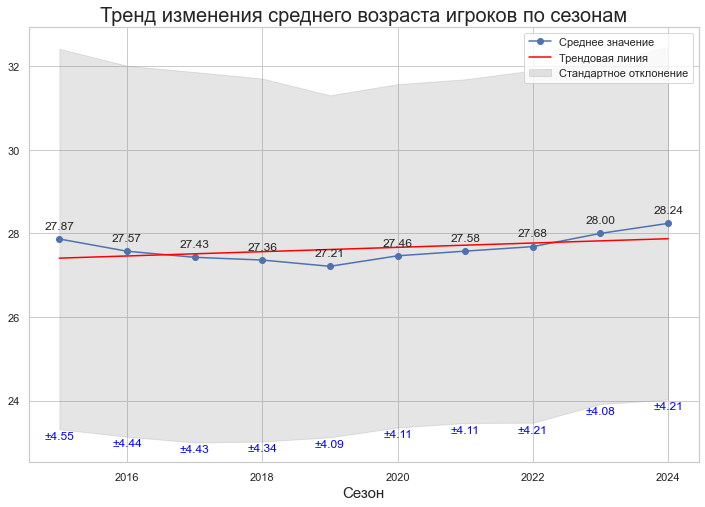

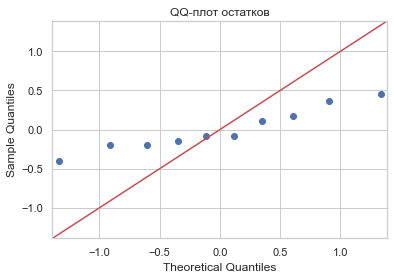

Шапиро-Уилк тест: Статистика=0.9445896148681641, p-значение=0.6051148176193237
Остатки распределены нормально


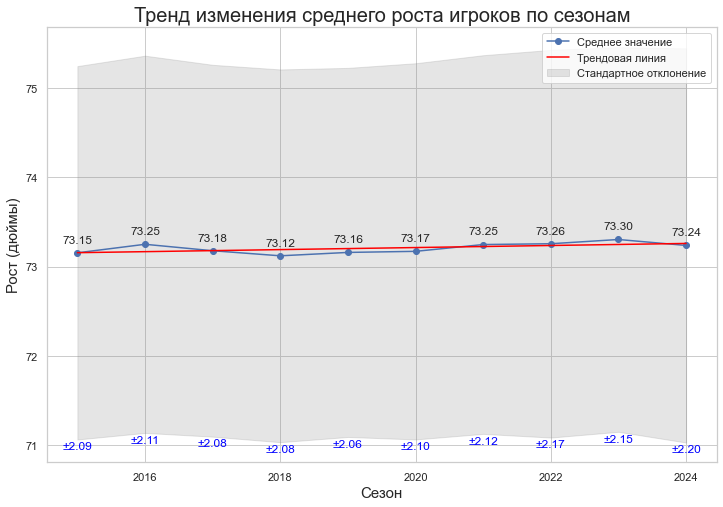

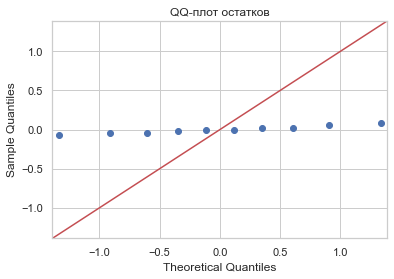

Шапиро-Уилк тест: Статистика=0.9729418158531189, p-значение=0.9166999459266663
Остатки распределены нормально


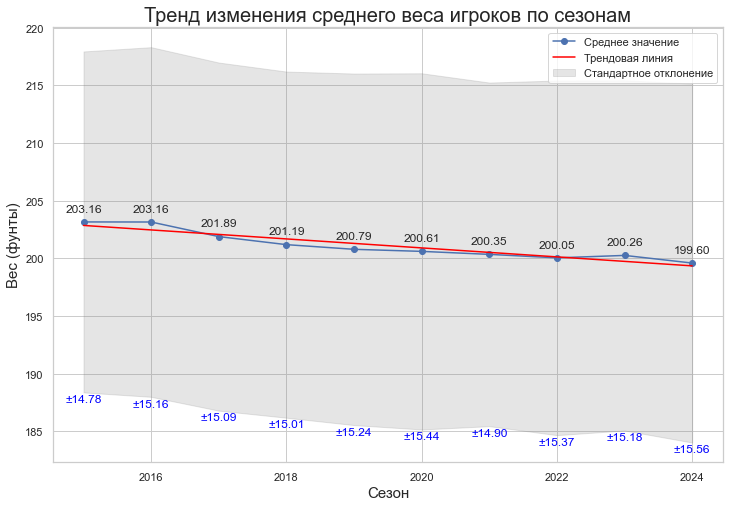

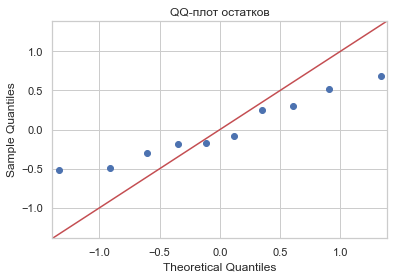

Шапиро-Уилк тест: Статистика=0.933466374874115, p-значение=0.48284029960632324
Остатки распределены нормально


In [77]:
# Функция регрессии временных рядов
def regresion_model(stats):
    # Подготовка данных для регрессии
    X = stats.index.values.reshape(-1, 1)
    y_mean = stats['mean'].values
    # Линейная регрессия
    model = LinearRegression()
    model.fit(X, y_mean)
    trend_line = model.predict(X)
    return trend_line, model. intercept_ , model. coef_[0]

# Функция для построения временных рядов и регрессионной линии
def plot_trend_with_regression(stats, title, ylabel):
    
    y_mean = stats['mean'].values
    std_dev = stats['std'].values
    trend_line, _, _ = regresion_model(stats)
    residuals = y_mean - trend_line
    # Построение графика
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    plt.plot(stats.index.to_numpy(), y_mean, marker='o', label='Среднее значение')
    plt.plot(stats.index.to_numpy(), trend_line, color='red', label='Трендовая линия')
    plt.fill_between(stats.index, stats['mean'] - stats['std'], stats['mean'] + stats['std'], color='gray', alpha=0.2, label='Стандартное отклонение')
    for i in range(len(stats)):
        plt.annotate(f'{y_mean[i]:.2f}', (stats.index.to_numpy()[i], y_mean[i]), 
                     textcoords="offset points", xytext=(0,10), ha='center')
        plt.annotate(f'±{std_dev[i]:.2f}', (stats.index.to_numpy()[i], y_mean[i] - std_dev[i]), 
                     textcoords="offset points", xytext=(0,-10), ha='center', color='blue')
    plt.title(title, fontsize=20)
    plt.xlabel('Сезон', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.show()
    
    # Проверка нормальности остатков
    sm.qqplot(residuals, line ='45')
    plt.title('QQ-плот остатков')
    plt.show()
    
   
    stat, p_value = shapiro(residuals)
    print(f'Шапиро-Уилк тест: Статистика={stat}, p-значение={p_value}')
    if p_value > 0.05:
        print('Остатки распределены нормально')
    else:
        print('Остатки не распределены нормально')


age_stats = calculate_statistics(data, 'season_numeric', 'age')
height_stats = calculate_statistics(data,'season_numeric', 'Ht')
weight_stats = calculate_statistics(data, 'season_numeric', 'Wt')
# Построение графиков для возраста, роста и веса
plot_trend_with_regression(age_stats, 'Тренд изменения среднего возраста игроков по сезонам', '')
plot_trend_with_regression(height_stats, 'Тренд изменения среднего роста игроков по сезонам', 'Рост (дюймы)')
plot_trend_with_regression(weight_stats, 'Тренд изменения среднего веса игроков по сезонам', 'Вес (фунты)')

# Сегментированный анализ:


Проведем анализ отдельно для различных позиций игроков (нападающие, защитники), чтобы выявить возможные различия в трендах по позициям.

In [23]:
# Фильтрация данных по позициям
forwards = data.query('Pos == "R" or Pos == "L" or Pos == "C"')
defenders = data[data['Pos'] == 'D']


In [24]:
# Функция для расчета статистических показателей
def calculate_statistics_by_position(position):
    age_stats = calculate_statistics(position, 'season_numeric', 'age')
    height_stats = calculate_statistics(position, 'season_numeric','Ht')
    weight_stats = calculate_statistics(position, 'season_numeric','Wt')
    return age_stats, height_stats, weight_stats

In [25]:
# Расчет статистических показателей для каждой позиции
forwards_age_stats, forwards_height_stats, forwards_weight_stats = calculate_statistics_by_position(forwards)
defenders_age_stats, defenders_height_stats, defenders_weight_stats = calculate_statistics_by_position(defenders)

Тренды для позиции: Forwards


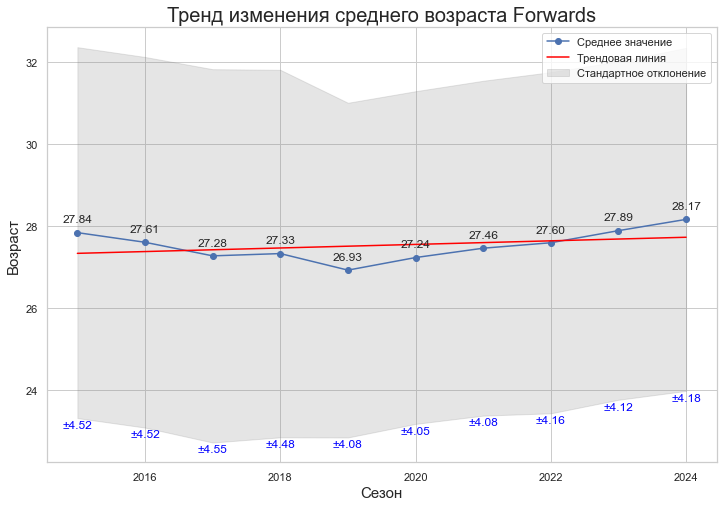

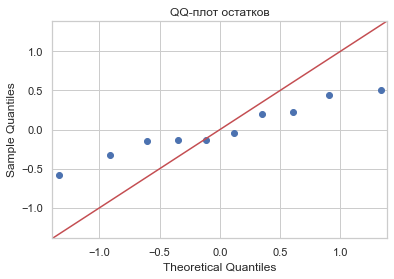

Шапиро-Уилк тест: Статистика=0.9573572278022766, p-значение=0.7553703188896179
Остатки распределены нормально


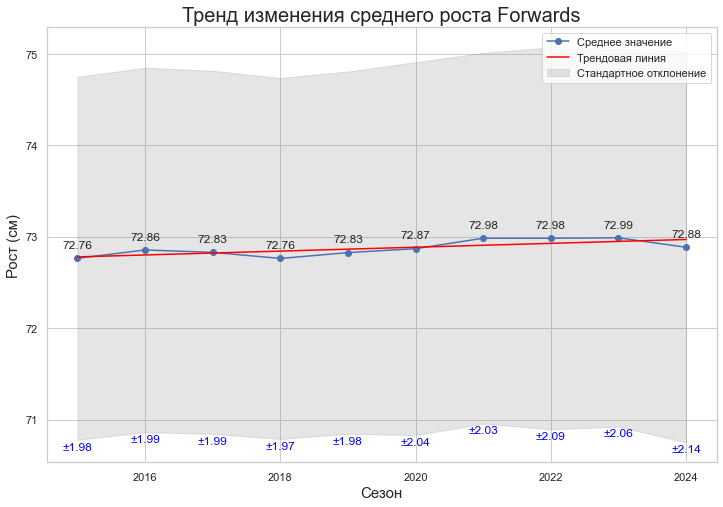

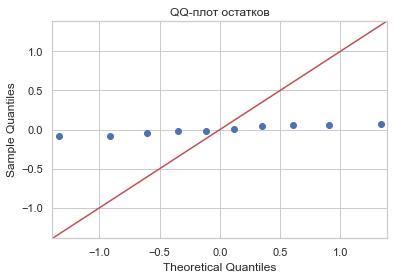

Шапиро-Уилк тест: Статистика=0.9337685108184814, p-значение=0.48596513271331787
Остатки распределены нормально


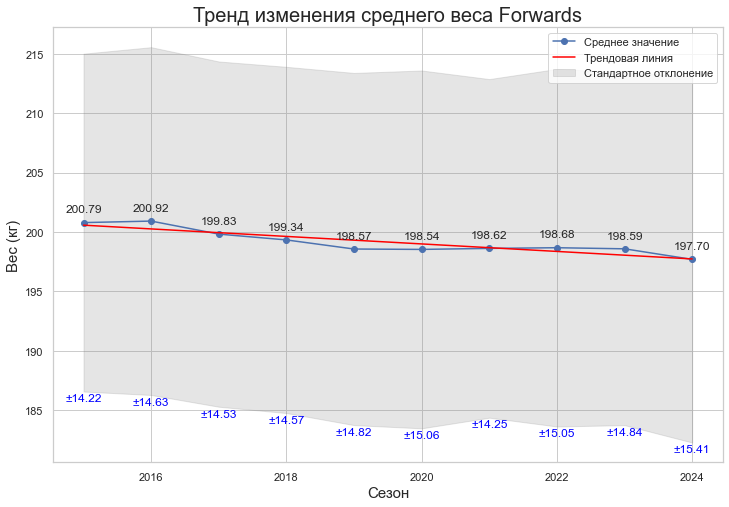

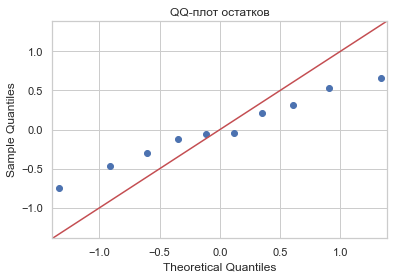

Шапиро-Уилк тест: Статистика=0.9799492955207825, p-значение=0.9648962020874023
Остатки распределены нормально
Тренды для позиции: Defenders


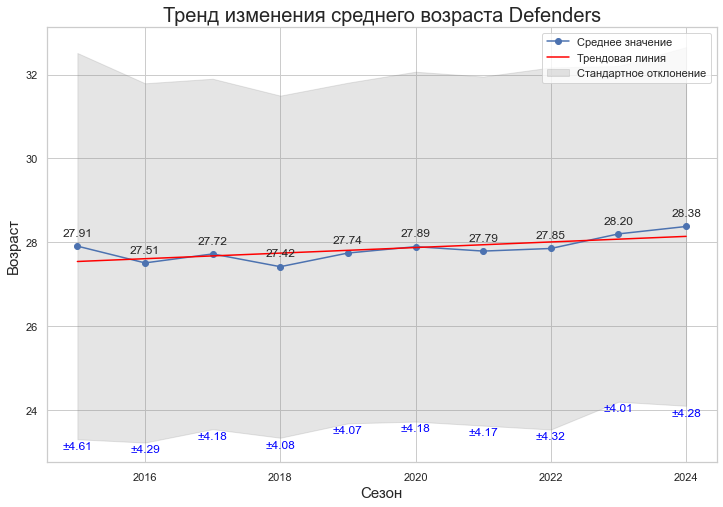

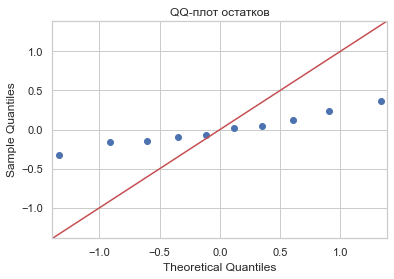

Шапиро-Уилк тест: Статистика=0.9793826937675476, p-значение=0.9617790579795837
Остатки распределены нормально


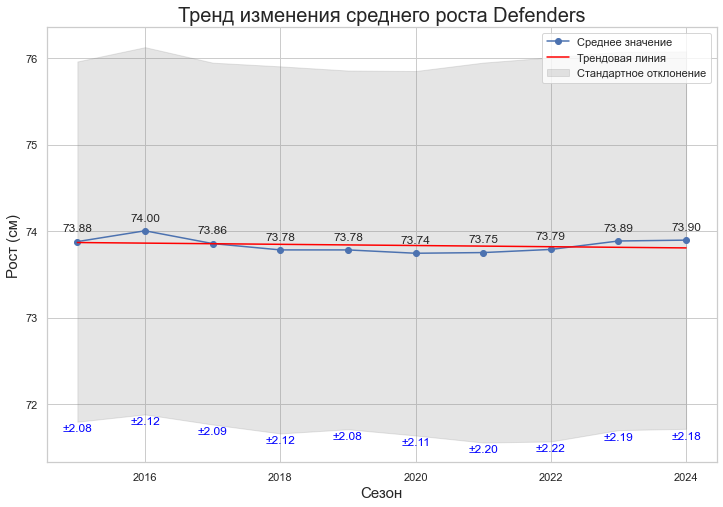

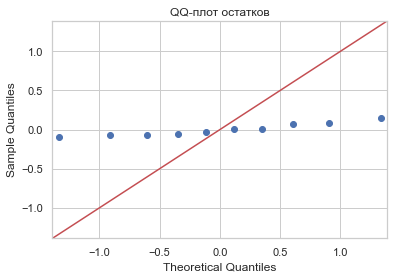

Шапиро-Уилк тест: Статистика=0.9170318841934204, p-значение=0.33286333084106445
Остатки распределены нормально


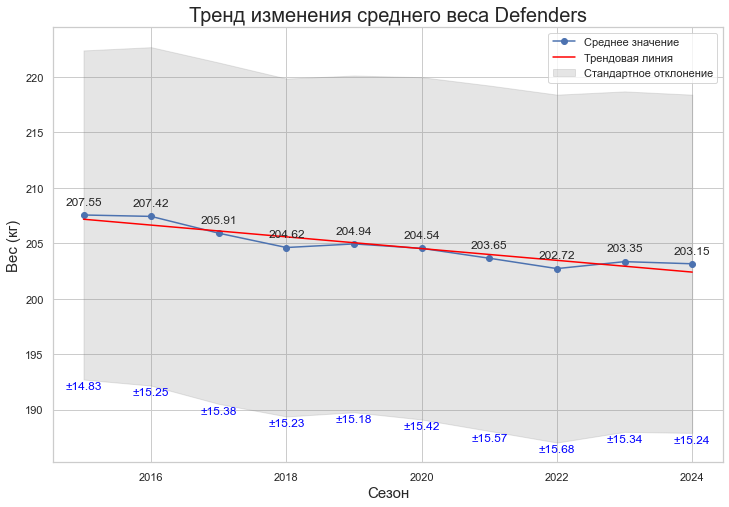

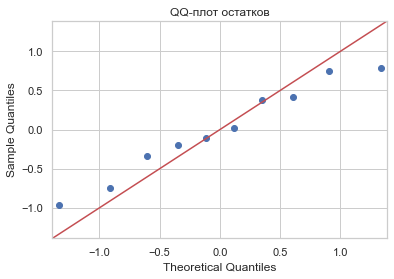

Шапиро-Уилк тест: Статистика=0.9545759558677673, p-значение=0.7226994633674622
Остатки распределены нормально


In [78]:
# Построение графиков для каждой позиции
positions = {
    'Forwards': (forwards_age_stats, forwards_height_stats, forwards_weight_stats),
    'Defenders': (defenders_age_stats, defenders_height_stats, defenders_weight_stats),
}

for position, (age_stats, height_stats, weight_stats) in positions.items():
    print(f'Тренды для позиции: {position}')
    plot_trend_with_regression(age_stats,  f'Тренд изменения среднего возраста {position}', 'Возраст')
    plot_trend_with_regression(height_stats,  f'Тренд изменения среднего роста {position}', 'Рост (см)')
    plot_trend_with_regression(weight_stats,  f'Тренд изменения среднего веса {position}', 'Вес (кг)')

# Анализ регрессии

## Тест Манна-Кендалла

Для выявления тренда мы будем использовать Тест [Манна-Кендалла](https://doi.org/10.21105/joss.01556). Он является мощным инструментом для выявления трендов во временных рядах, особенно когда данные не обязательно распределены нормально. 

In [80]:
features = ['age', 'Ht', 'Wt']
result = []
for column in features:
    MK = mk. original_test (data.groupby('season')[column].agg('mean'))
    stats = calculate_statistics(data, 'season_numeric', column)
    _, x0, x = regresion_model(stats)
    stats = [MK.p, MK.trend, x0,x, 10*x, MK.Tau]
    result.append(stats)

In [81]:
index = ['Age', 'Height', 'Weight']
column = ['p-value', 'regression', 'slope', 'intercept', 'effect', 'Tau']

In [82]:
df = pd.DataFrame(result, columns=column, index=index)

In [83]:
print('Показатели регрессии для возраста, роста и веса за сзоны "2014-2015" - "2023-2024"')
df

Показатели регрессии для возраста, роста и веса за сзоны "2014-2015" - "2023-2024"


,p-value,regression,slope,intercept,effect,Tau
Age,0.152406,no trend,-76.611793,0.051623,0.516228,0.377778
Height,0.107405,no trend,49.991625,0.011496,0.114960,0.422222
Weight,0.000172,decreasing,987.935300,-0.389616,-3.896159,-0.955556


Где:
`p-value` - значение p-value теста

`regression` - показатель наличия и направления тренда

`slope` и `intercept` - коэффициенты регрессии (наклон и свободный коэффициент)

`effect` - Средняя разница между показателями в начале и в конце исследуемого периода
    
`Tau` - коэффициент корреляции Кенделла. Значение от -1 до 1. Значение 1 указывает на идеальную положительную корреляцию (все данные увеличиваются), значение -1 указывает на идеальную отрицательную корреляцию (все данные уменьшаются).

Мы видим четкий тренд на снижение возраста веса игроков. За 10 лет регрессия составила 3,896 фунта или примерно 1,77 кг. С одной стороны, это не такая большая разница, с другой значение коэффициент корреляции Кенделла Tau говорит об устойчивом отрицательном тренде

## Регрессия для каждой позиции

Давайте посмотрим, что покажет Тест Манна-Кендалла для показателей веса игроков на каждой позиции.

In [43]:
result = []
for position in [defenders_weight_stats, forwards_weight_stats]:
    MK = mk. original_test (position['mean'])
    #stats = calculate_statistics(defenders_weight_stats, 'season_numeric', 'mean')
    _, x0, x = regresion_model(position)
    stats = [MK.p, MK.trend, x0,x, 10*x, MK.Tau]
    result.append(stats)


In [46]:
index = ['Defenders', 'Forwards']
column = ['p-value', 'regression', 'slope', 'intercept', 'effect', 'Tau']

In [47]:
df_position = pd.DataFrame(result, columns=column, index=index)

In [48]:
df_position

,p-value,regression,slope,intercept,effect,Tau
Defenders,0.000677,decreasing,1274.143826,-0.529516,-5.295163,-0.866667
Forwards,0.012266,decreasing,836.922875,-0.315804,-3.158039,-0.644444


*Мы видим, что тренд для снижения веса присутствует как для, защитников, так и для наподающих, но для защитников он более выражен. За 10 лет средний вес защитников сократился на 5,3 фунта или примерно 2,4 кг.*

# Анализ регрессии для новых игроков

Давайте проанализируем, как изменились показатели роста и веса, для игроков, который проводили свои дебютные сезоны в лиге.

In [49]:
# Создадим датасет ,в который отберем игроков, проводящих свой первый сезон
data_first = data[data['1st Season'] == data['season_numeric']]

In [50]:
data_first.head()

,Pos,Ht,Wt,GP,season,1st Season,age,Ht_cm,Wt_kg,season_numeric
6,C,73,208,18,2014-2015,2015,24,185,94.35,2015
7,R,70,188,12,2014-2015,2015,22,178,85.28,2015
28,L,71,198,81,2014-2015,2015,30,180,89.81,2015
39,D,72,205,10,2014-2015,2015,24,183,92.99,2015
76,L,75,209,53,2014-2015,2015,20,190,94.80,2015


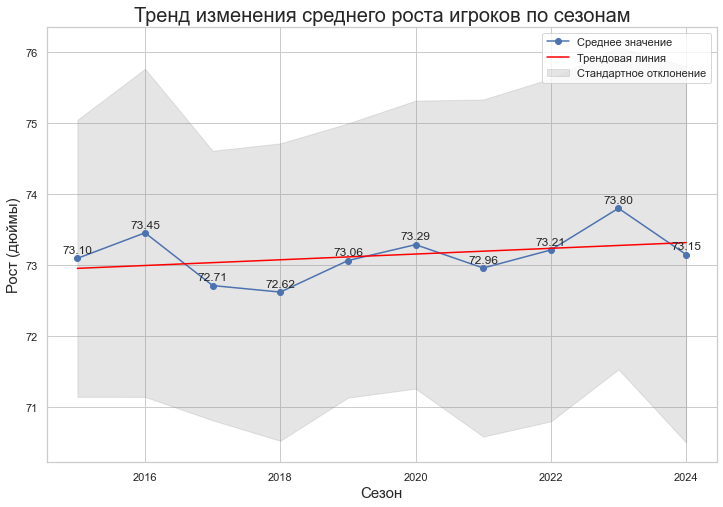

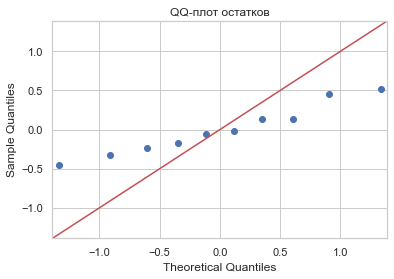

Шапиро-Уилк тест: Статистика=0.9542303681373596, p-значение=0.7186148762702942
Остатки распределены нормально


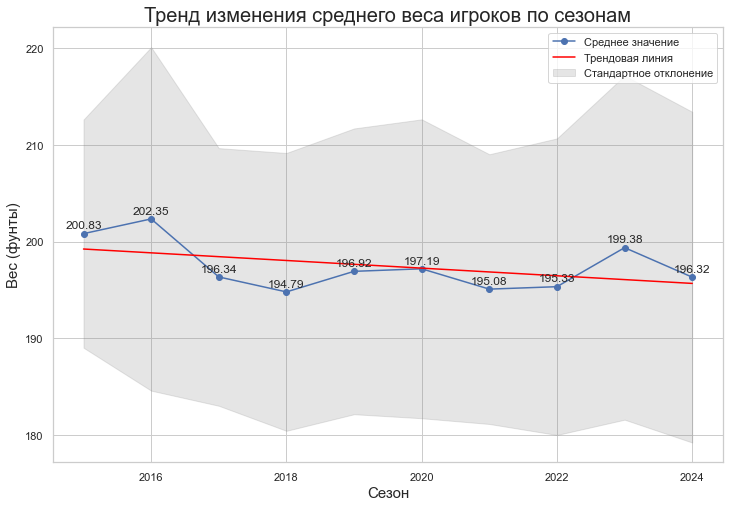

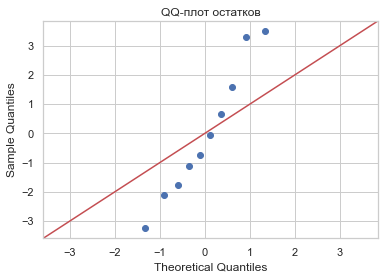

Шапиро-Уилк тест: Статистика=0.9508253335952759, p-значение=0.678272545337677
Остатки распределены нормально


In [53]:
height_stats_first = calculate_statistics(data_first,'season_numeric', 'Ht')
weight_stats_first = calculate_statistics(data_first, 'season_numeric', 'Wt')
# Построение графиков для роста и веса
plot_trend_with_regression(height_stats_first, 'Тренд изменения среднего роста игроков по сезонам', 'Рост (дюймы)')
plot_trend_with_regression(weight_stats_first, 'Тренд изменения среднего веса игроков по сезонам', 'Вес (фунты)')

Проведем тест Манна-Кендалла для показателей роста и веса игроков ,проводящих первый сезон в лиге

In [55]:
result=[]
for column in ['Ht', 'Wt']:
    MK = mk. original_test (data_first.groupby('season')[column].agg('mean'))
    stats = calculate_statistics(data_first, 'season_numeric', column)
    _, x0, x = regresion_model(stats)
    stats = [MK.p, MK.trend, x0,x, 10*x,10*0.453592*x, MK.Tau]
    result.append(stats)

In [56]:
column = ['p-value', 'regression', 'slope', 'intercept', 'effect, lb','effect, kg', 'Tau']
index=['Height', 'Weight']

In [59]:
df_first_season = pd.DataFrame(result, columns=column, index = index)

In [60]:
df_first_season

,p-value,regression,slope,intercept,"effect, lb","effect, kg",Tau
Height,0.474274,no trend,-8.207392,0.040279,0.402788,0.182701,0.2
Weight,0.474274,no trend,996.715891,-0.395773,-3.957726,-1.795193,-0.2


Мы видим, что нет какой-то регрессии по изменению роста и веса игроков, проводящих 1 сезон в лиге. Значит клуюы не стремятся брать более легких и низких игроков, а смотрят на другие показатели (скилы хоккеистов). А отрицательный тренд для веса игроков НХЛ может говорить о том, что игроков просто приводят в оптимальные кондиции в соответствии с их физиологическими показателями.

# Регрессия индекса массы тела

Давайте рассчитаем индекс массы тела для хоккеистов, чтобы посмотреть меняется ли он от сезона к сезону.
Формула для рассчета следующая:

    BMI = ( Weight in Pounds / (Height in inches) x (Height in inches) ) x 703
    


In [65]:
data['BMI'] = (data['Wt'] / data['Ht']**2) * 703

In [73]:
data.head()

,Pos,Ht,Wt,GP,season,1st Season,age,Ht_cm,Wt_kg,season_numeric,BMI
0,L,74,213,71,2014-2015,2008,28,188,96.62,2015,27.344595
1,R,72,200,70,2014-2015,2001,38,183,90.72,2015,27.121914
2,R,70,185,13,2014-2015,2013,25,178,83.91,2015,26.541837
3,D,77,223,11,2014-2015,2001,35,196,101.15,2015,26.441052
4,D,75,213,82,2014-2015,2009,27,190,96.62,2015,26.620267


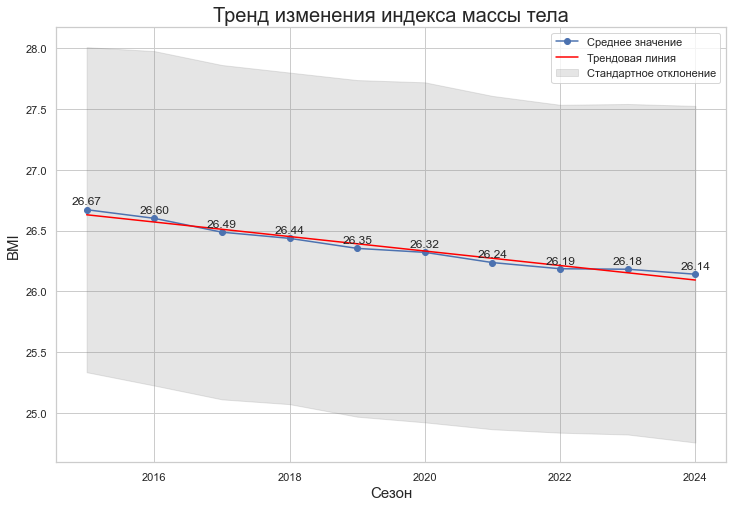

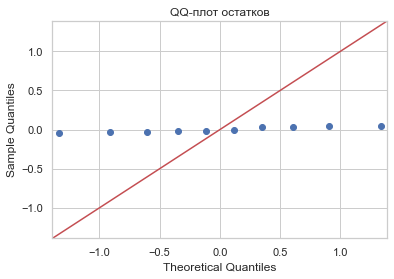

Шапиро-Уилк тест: Статистика=0.8633954524993896, p-значение=0.0836651548743248
Остатки распределены нормально


In [68]:
bmi_stats = calculate_statistics(data,'season_numeric', 'BMI')

# Построение графиков для роста и веса
plot_trend_with_regression(bmi_stats, 'Тренд изменения индекса массы тела', 'BMI')


Визуально виден по тренд на снижение показателей BMI. Давайте посмотрим, что покажет тест Манна-Кендалла

In [70]:
result=[]
MK = mk. original_test (data.groupby('season')['BMI'].agg('mean'))
stats = calculate_statistics(data, 'season_numeric', 'BMI')
_, x0, x = regresion_model(stats)
stats = [MK.p, MK.trend, x0,x, 10*x, MK.Tau]
result.append(stats)

In [71]:
column = ['p-value', 'regression', 'slope', 'intercept', 'effect', 'Tau']
index=['BMI index']
df = pd.DataFrame(result, columns=column, index = index)

In [72]:
df

,p-value,regression,slope,intercept,effect,Tau
BMI index,0.000083,decreasing,146.917965,-0.059696,-0.596957,-1.0


**Все показатели говорят об устойчивом тренде на уменьшение показателя BMI. Хотя эффект за 10 лет не такой значительный, но тренд на снижение устойчивый. Однако, по показателям ВОЗ, хоккеисты находятся в зоне избыточного веса.**

# Вывод

Целью исследования было изучить как изменяются основные физиологичесике показатели игроков Национально Хоккейно Лиги (рост, вес, возраст) за последние 10 лет. В ходе анализа данных мы получили следующие результаты:
 - За последние 10 лет наболюдается тренд на снижение веса игроков НХЛ.
 - Тренд на снижение возраста и роста отсутствет. То есть утверждение "лига молодеет" - неверно.
Так же мы проанализировали игроков, который проводят первый год в лиге и не выяявили тренды. Это значит, что **игроки заходит в лигу примерно с одинаковыми средними показателями роста и веса каждый сезон**. А уменьшение веса идет уже в ходе тренировочного процесса в клубе.
Мы проверили как менялся индекс массы тела хоккеистов и нашли устойчивый тренд к его ***понижению***.
Хотя в абсолютных значениях цифры снижения веса и BMI индекса не такие большие. Однако тенденция присутствует. Игроки НХЛ постепенно становятся легче.